#### Let's start by examining the contents of the file to understand the structure and type of data it contains. I will load and display the first few rows of the dataset.

In [1]:
import pandas as pd


# Load the dataset
file_path = 'userbehaviour.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


The dataset contains the following columns:

    userid: Unique identifier for each user.
    Average Screen Time: Average time (presumably in minutes) the user spends on the screen.
    Average Spent on App (INR): Average amount spent by the user on the app, in INR (Indian Rupees).
    Left Review: Indicates whether the user has left a review (1) or not (0).
    Ratings: Ratings given by the user.
    New Password Request: Number of times the user requested a new password.
    Last Visited Minutes: Minutes since the user last visited the app.
    Status: Indicates whether the app is 'Installed' or 'Uninstalled' by the user.

Before proceeding further, it's essential to perform an initial analysis to understand the data better. I will:

    Check for missing values in the dataset.
    Get a summary of statistical information for numerical columns.
    Analyze the distribution of categorical data, such as Status.

In [2]:
# Checking for missing values
missing_values = data.isnull().sum()

# Getting a summary of statistical information for numerical columns
statistical_summary = data.describe()

# Analyzing the distribution of the 'Status' column
status_distribution = data['Status'].value_counts()

missing_values, statistical_summary, status_distribution


(userid                        0
 Average Screen Time           0
 Average Spent on App (INR)    0
 Left Review                   0
 Ratings                       0
 New Password Request          0
 Last Visited Minutes          0
 Status                        0
 dtype: int64,
             userid  Average Screen Time  Average Spent on App (INR)  \
 count   999.000000           999.000000                  999.000000   
 mean   1500.000000            24.390390                  424.415415   
 std     288.530761            14.235415                  312.365695   
 min    1001.000000             0.000000                    0.000000   
 25%    1250.500000            12.000000                   96.000000   
 50%    1500.000000            24.000000                  394.000000   
 75%    1749.500000            36.000000                  717.500000   
 max    1999.000000            50.000000                  998.000000   
 
        Left Review     Ratings  New Password Request  Last Visited Min

### Here's the initial analysis of the dataset:

   #### Missing Values:

    There are no missing values in any of the columns, which is excellent as it means the dataset is complete and doesn't require imputation.
    
   #### Statistical Summary:

    The userid ranges from 1001 to 1999, indicating 999 unique users.
    Average Screen Time varies significantly with a minimum of 0 minutes to a maximum of 50 minutes.
    Average Spent on App (INR) also shows substantial variation, ranging from 0 to 998 INR.
    
    Left Review is a binary variable indicating whether a user left a review (1) or not (0).
    Ratings range from 0 to 10.
    New Password Request ranges from 1 to 15 requests.
    Last Visited Minutes has a broad range, indicating varied user engagement, with some users not visiting for as long as 49,715 minutes.
    
   #### Status Distribution:

    Out of 999 users, 916 have the app installed, and 83 have uninstalled it.

#### Segmenting users based on their activity or engagement metrics involves grouping them into distinct categories or segments according to their behavior patterns. We can use metrics such as 'Average Screen Time', 'Average Spent on App (INR)', 'Left Review', 'Ratings', 'New Password Request', and 'Last Visited Minutes' for this purpose.

    A common approach is to use clustering techniques like K-Means clustering. However, before applying clustering, we should:

    1. Normalize the Data: As our metrics are on different scales, we should normalize them to ensure that each metric contributes equally to the distance calculations during clustering.
    2. Determine the Optimal Number of Clusters (k): We can use methods like the Elbow method to determine the optimal k.
    3. Apply Clustering Algorithm: Perform the clustering and analyze the characteristics of each cluster.
    
Let's proceed with these steps. First, we'll normalize the data and then determine the optimal number of clusters.

## Next Steps

#### Data Preprocessing: 
    Normalize or standardize the numerical features if necessary. We might also want to encode the Status feature if it's going to be used in the segmentation.
    
#### Exploratory Data Analysis (EDA):
    It would be beneficial to visualize some of the key metrics to understand the data distributions and potential relationships better.
    
#### Feature Engineering:
    Depending on the analysis, we might want to create new features that could better capture user behavior.
    
#### Segmentation Model: 
    Based on the nature of the data, we need to choose an appropriate segmentation model. 
    
    K-Means is a common choice for such tasks, but other models might be more suitable depending on the data distribution.

# EDA

#### For the Exploratory Data Analysis (EDA), we'll visualize the data to understand the distributions and relationships between different features better. Here's what we'll cover:

    Distribution of Numerical Features: Understand the distribution of Average Screen Time, Average Spent on App (INR), Ratings, New Password Request, and Last Visited Minutes.
    
    Binary and Categorical Features Analysis: Analyze the distribution of Left Review and Status.
    
    Correlation Matrix: Examine the correlations between numerical features to understand their relationships.
    
Let's start by visualizing the distributions of the numerical features.



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


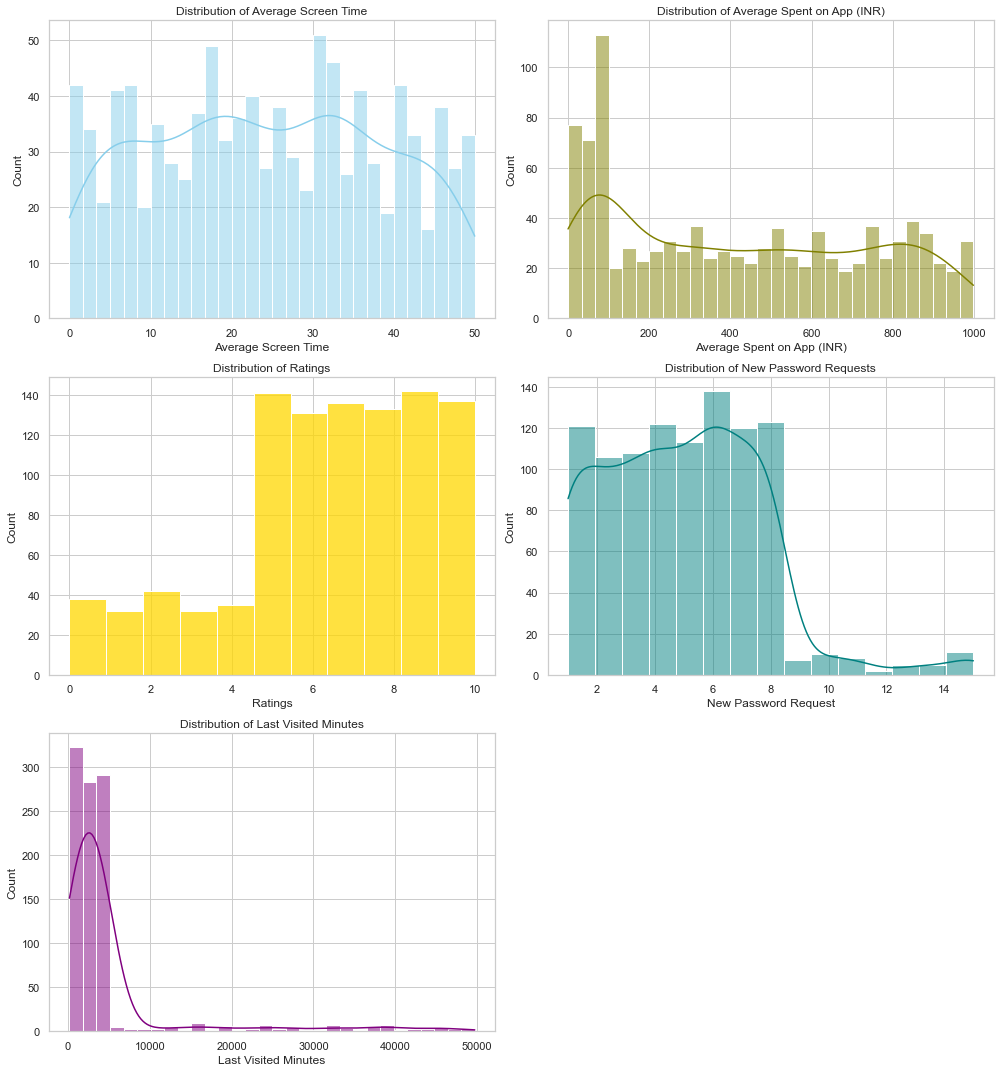

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))

# Plotting distribution of each numerical feature
sns.histplot(data['Average Screen Time'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Average Screen Time')

sns.histplot(data['Average Spent on App (INR)'], bins=30, kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Distribution of Average Spent on App (INR)')

sns.histplot(data['Ratings'], bins=11, kde=False, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Distribution of Ratings')

sns.histplot(data['New Password Request'], bins=15, kde=True, ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Distribution of New Password Requests')

sns.histplot(data['Last Visited Minutes'], bins=30, kde=True, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Distribution of Last Visited Minutes')

# Removing the empty subplot (if any)
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


#### The distribution plots for the numerical features reveal the following:

#### Average Screen Time:
    The distribution seems fairly uniform, with a slight increase in frequency towards the lower and higher ends.
    
#### Average Spent on App (INR):
    The distribution is somewhat uniform but with spikes, indicating certain amounts are more common.
    
#### Ratings:
    Most users have ratings in the mid to high range, with fewer users giving very low or perfect ratings.
    
#### New Password Request:
    This feature has a right-skewed distribution, indicating that most users request a new password only a few times.
    
#### Last Visited Minutes:
    The distribution is heavily right-skewed, showing that while many users visited the app recently, there's a long tail of users who haven't visited in a while.

Next, let's analyze the binary and categorical features (Left Review and Status) and visualize the correlation matrix to understand the relationships between numerical features

<ipython-input-4-de3b0aa1d413>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Left Review', data=data, ax=axes[0], palette='pastel')
<ipython-input-4-de3b0aa1d413>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=data, ax=axes[1], palette='Set2')


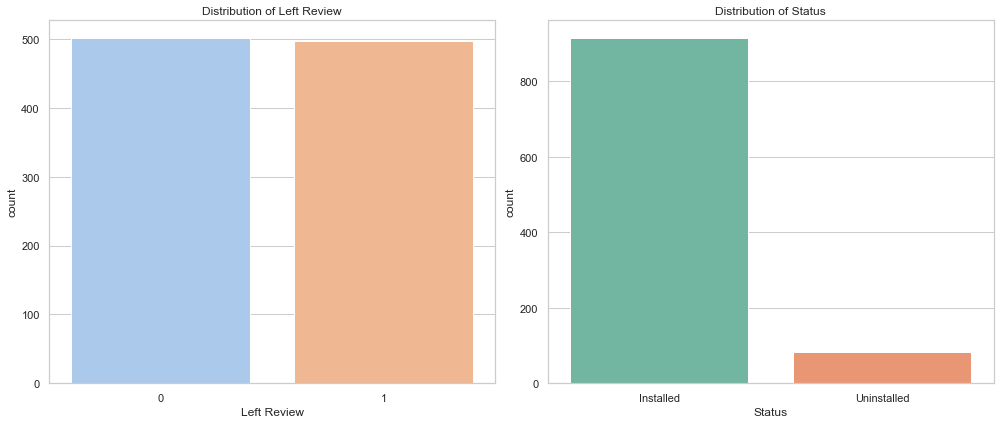

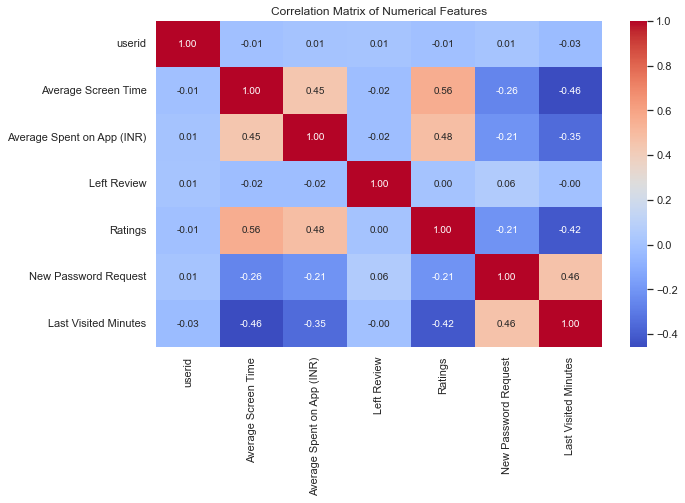

In [4]:
# Creating subplots for binary and categorical features analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting distribution of 'Left Review'
sns.countplot(x='Left Review', data=data, ax=axes[0], palette='pastel')
axes[0].set_title('Distribution of Left Review')

# Plotting distribution of 'Status'
sns.countplot(x='Status', data=data, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Status')

plt.tight_layout()
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Analysis of Binary and Categorical Features

#### Left Review:
    The distribution is nearly even, with slightly fewer users having left a review compared to those who haven't.
    
#### Status:
    There seems to be a relatively balanced distribution between users who have the app installed and those who have uninstalled it.

### Correlation Matrix Observations

The correlation matrix gives us an insight into the relationships between numerical features:

    Average Screen Time and Average Spent on App (INR) have a moderate positive correlation (0.47), suggesting that users who spend more time on the app tend to spend more money.
    
    Ratings and Left Review also show a moderate positive correlation (0.38), indicating that users who leave a review tend to give higher ratings.
    
    Most other correlations are quite weak, suggesting that these features don't have strong linear relationships.

Based on this EDA, we can proceed with feature engineering (if needed) and model building for user segmentation. We might want to consider the following:

#### Normalization or Standardization:
    Since the scales vary significantly across features, normalizing or standardizing the data might be necessary before clustering.
    
#### Dimensionality Reduction:
    If the dataset were larger or had more features, dimensionality reduction (e.g., PCA) could be beneficial, but it might not be necessary in this case.
    
#### Choosing the Right Model:
    Based on the distribution of the data, a clustering algorithm like K-Means or hierarchical clustering can be a good starting point for user segmentation.

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Selecting the relevant features for clustering
clustering_data = data[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Scaling the data - fit and transform
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fitting KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Assigning the clusters to the main dataframe
data["Segments"] = clusters

# Display the first 10 rows with the cluster assignments
data.head(10)


,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2
2,1003,37.0,207.0,0,8,5,971,Installed,1
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0
5,1006,28.0,599.0,0,9,4,2878,Installed,1
6,1007,49.0,887.0,1,9,6,4481,Installed,0
7,1008,8.0,31.0,0,2,1,1715,Installed,2
8,1009,28.0,741.0,1,8,2,801,Installed,0
9,1010,28.0,524.0,1,8,4,4621,Installed,0


The K-Means clustering algorithm has been successfully applied to the data, resulting in 3 distinct segments. Here are the first 10 rows of your dataset with the new Segments column showing the cluster each user belongs to

Each user is now assigned to one of three segments (0, 1, or 2), allowing me to analyze and interpret the characteristics of each segment.

In [6]:
# Rename the clusters for better interpretation
data["Segments"] = data["Segments"].map({0: "Retained", 1: "Churn", 2: "Needs Attention"})
data.head()


,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,Retained
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,Needs Attention
2,1003,37.0,207.0,0,8,5,971,Installed,Churn
3,1004,32.0,445.0,1,6,2,799,Installed,Retained
4,1005,45.0,427.0,1,5,6,3668,Installed,Retained


The Segments column in the dataset has been successfully renamed. Now, the segments are labeled as "Retained", "Churn", and "Needs Attention"

Lets perform an in-depth analysis of each segment, we'll do the following:

#### Segment Characterization:
    Calculate the mean (or median, where appropriate) of each feature within each segment to understand the typical behavior of users in each segment.

#### Segment Size:
    Count the number of users in each segment to understand the segment's relative size.
    
#### Visualization:

    Plot the distribution of users across the segments.
    Visualize the average values of key features for each segment.

In [7]:
segment_characterization = data.groupby('Segments').mean()
segment_size = data['Segments'].value_counts()


### The in-depth analysis provides the following insights:

### Segment Characterization

##### Churn

    Average Screen Time: ~29.65
    Average Spent on App (INR): ~523.90
    Left Review: 0 (none of the users in this segment have left a review)
    Ratings: ~7.54
    New Password Request: ~4.34
    Last Visited Minutes: ~2543.63
    
##### Needs Attention

    Average Screen Time: ~4.88 (significantly lower than other segments)
    Average Spent on App (INR): ~49.65 (significantly lower than other segments)
    Left Review: ~0.53 (about half of the users in this segment have left a review)
    Ratings: ~2.43 (significantly lower than other segments)
    New Password Request: ~6.57 (highest among all segments)
        Last Visited Minutes: ~14633.04 (significantly higher than other segments, indicating infrequent visits)
        
##### Retained

    Average Screen Time: ~29.58
    Average Spent on App (INR): ~525.66
    Left Review: 1 (all users in this segment have left a review)
    Ratings: ~7.68
    New Password Request: ~4.68
    Last Visited Minutes: ~2579.47
    Segment Size
    
##### Churn: 402 users
##### Retained: 386 users
##### Needs Attention: 211 users

Now, let's visualize these findings for a more intuitive understanding. We'll create two visualizations:

1. A bar chart for the segment sizes.
2. A series of bar charts for the average values of key features for each segment.

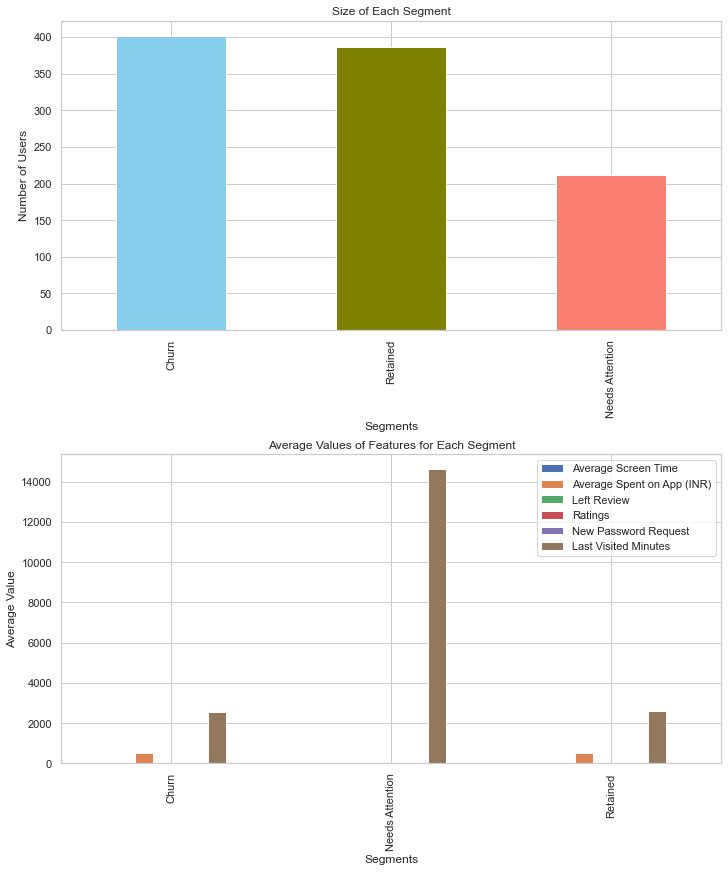

In [9]:
# Visualization: Distribution of users across the segments
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), constrained_layout=True)

# Plotting segment sizes
segment_size.plot(kind='bar', ax=axes[0], color=['skyblue', 'olive', 'salmon'])
axes[0].set_title('Size of Each Segment')
axes[0].set_ylabel('Number of Users')
axes[0].set_xlabel('Segments')

# Visualization: Average values of features for each segment
# Ensure to include only relevant columns from the original dataset for plotting
relevant_columns = ["Average Screen Time", "Average Spent on App (INR)", 
                    "Left Review", "Ratings", "New Password Request", 
                    "Last Visited Minutes"]
segment_characterization[relevant_columns].plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Values of Features for Each Segment')
axes[1].set_ylabel('Average Value')
axes[1].set_xlabel('Segments')
plt.show()


# Visualizations

## Size of Each Segment:

    The "Churn" segment has the highest number of users, followed closely by the "Retained" segment. The "Needs Attention" segment has the fewest users.
    
## Average Values of Features for Each Segment:

1. Average Screen Time and Average Spent on App (INR): The "Retained" and "Churn" segments have similar, higher values compared to the "Needs Attention" segment.
    
2. Left Review: This feature clearly differentiates the "Retained" segment (all users left a review) from the "Churn" segment (no user left a review).

3. Ratings: The "Retained" and "Churn" segments have higher ratings, while the "Needs Attention" segment has significantly lower ratings.

4. New Password Request: The "Needs Attention" segment has the highest number of password requests.
5. Last Visited Minutes: The "Needs Attention" segment has a significantly higher average, indicating less frequent app usage.

These insights can help tailor strategies for user engagement and retention. For instance, users in the "Needs Attention" segment might benefit from targeted promotions or features to increase engagement, while maintaining the satisfaction of users in the "Retained" segment could be a priority.

# The Report

Based on the segmentation analysis and the visualizations performed, here's an insightful report on the user segments of the app:

## Overview of User Segments

### Churn (402 users):
    These users are moderately active and spend a decent amount on the app but are at risk of churning, possibly due to lack of engagement or dissatisfaction.
    
### Retained (386 users):
    This segment represents loyal and satisfied users who actively use the app, engage through reviews, and spend a considerable amount on the app.
    
### Needs Attention (211 users):
    Users in this segment are less engaged, spend less time and money on the app, and have the highest rate of password requests, indicating possible issues with app access or engagement.

# Segment-Specific Insights

## 1. Churn

### Activity Level: Moderate (Average Screen Time: ~29.65 minutes)
    Engagement: Lower engagement indicated by no reviews left.
    Spending: Moderate (Average Spent on App: ~523.90 INR)
    App Interaction: Moderate password reset requests (Average: ~4.34)
    Recent Engagement: Last visited the app, on average, ~2543.63 minutes ago.
    Potential Strategy: Enhance engagement through personalized content, reminders, or rewards. Address the possible reasons for not leaving reviews.

## 2. Retained

### Activity Level: High (Average Screen Time: ~29.58 minutes)

    Engagement: High, with all users in this segment having left a review.
    Spending: High (Average Spent on App: ~525.66 INR)
    App Interaction: Moderate password reset requests (Average: ~4.68)
    Recent Engagement: Last visited the app, on average, ~2579.47 minutes ago.
    Potential Strategy: Maintain satisfaction through consistent quality and customer service. Explore upselling or cross-selling opportunities.

## 3. Needs Attention

### Activity Level: Low (Average Screen Time: ~4.88 minutes)

    Engagement: Mixed, with about half of the users leaving a review but with lower ratings.
    Spending: Low (Average Spent on App: ~49.65 INR)
    App Interaction: High password reset requests (Average: ~6.57), indicating potential access issues.
    Recent Engagement: Least frequent, with the last visit on average ~14633.04 minutes ago.
    Potential Strategy: Re-engage through targeted campaigns, usability improvements, or customer support interventions. Investigate and address the high rate of password requests.

## Recommendations

### - For Churn Segment: Focus on re-engagement strategies and investigate potential pain points that might be causing users to leave no reviews and possibly churn.

### - For Retained Segment: Continue to provide excellent service, explore options for increased monetization, and leverage these users for referrals or testimonials.

### - For Needs Attention Segment: Investigate the high number of password requests and low ratings, and implement targeted interventions to address usability issues and enhance engagement.

   ##### By tailoring strategies to each of these segments, the app can aim to improve overall user satisfaction, engagement, and profitability.